In [5]:
import pandas as pd;

#lecture du fichier
with open("titanic-passengers.csv",'r') as file:
    new_file=file.read()
    

#remplacer les ; en  et les , en espace vide
new_file=new_file.replace(","," ")
new_file=new_file.replace(";",",")


#ecriture dans le fichier
with open("titanic-passengers.csv",'w') as file:
    file.write(new_file)

    



In [46]:
#importation de la bibliothéque pandas
import pandas as pd;

#création de dataframe from csv
data=pd.read_csv("titanic-passengers.csv",encoding='ISO-8859-1')
#affichage des 5 premieres données avec leur entete
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,Collander Mr. Erik Gustaf,male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,Moen Mr. Sigurd Hansen,male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,Jensen Mr. Hans Peder,male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,Palsson Mrs. Nils (Alma Cornelia Berglund),female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,Davidson Mr. Thornton,male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [47]:
#preparation des données pour la regression logique
data["Survived"]=data["Survived"].map({"Yes": 1, "No": 0})   #convertir survived en variable numerique numerical

data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,Collander Mr. Erik Gustaf,male,28.0,0,0,248740,13.0000,NaN,S
1,76,0,3,Moen Mr. Sigurd Hansen,male,25.0,0,0,348123,7.6500,F G73,S
2,641,0,3,Jensen Mr. Hans Peder,male,20.0,0,0,350050,7.8542,NaN,S
3,568,0,3,Palsson Mrs. Nils (Alma Cornelia Berglund),female,29.0,0,4,349909,21.0750,NaN,S
4,672,0,1,Davidson Mr. Thornton,male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,Nasser Mrs. Nicholas (Adele Achem),female,14.0,1,0,237736,30.0708,NaN,C
887,61,0,3,Sirayanian Mr. Orsen,male,22.0,0,0,2669,7.2292,NaN,C
888,535,0,3,Cacic Miss. Marija,female,30.0,0,0,315084,8.6625,NaN,S
889,102,0,3,"Petroff Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S


In [48]:
#remplacement de la valeur manquante par la moyenne de tte la colonne age
data['Age'].fillna(data['Age'].mean(),inplace=True)
#convertir le type age( float) en int
data['Age']=data['Age'].astype('int64')

x=data['Cabin']
numb_elements=len(x)
print(numb_elements)
#nombre d'éléments par catégorie
print(x.value_counts())
#remplacer et afficher les valeurs
x.fillna('G6',inplace=True)
data


891
G6             4
B96 B98        4
C23 C25 C27    4
F33            3
D              3
              ..
C91            1
D45            1
F G63          1
A34            1
E63            1
Name: Cabin, Length: 147, dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,Collander Mr. Erik Gustaf,male,28,0,0,248740,13.0000,G6,S
1,76,0,3,Moen Mr. Sigurd Hansen,male,25,0,0,348123,7.6500,F G73,S
2,641,0,3,Jensen Mr. Hans Peder,male,20,0,0,350050,7.8542,G6,S
3,568,0,3,Palsson Mrs. Nils (Alma Cornelia Berglund),female,29,0,4,349909,21.0750,G6,S
4,672,0,1,Davidson Mr. Thornton,male,31,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,Nasser Mrs. Nicholas (Adele Achem),female,14,1,0,237736,30.0708,G6,C
887,61,0,3,Sirayanian Mr. Orsen,male,22,0,0,2669,7.2292,G6,C
888,535,0,3,Cacic Miss. Marija,female,30,0,0,315084,8.6625,G6,S
889,102,0,3,"Petroff Mr. Pastcho (""Pentcho"")",male,29,0,0,349215,7.8958,G6,S


In [50]:
# importation des librairies
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


#extractions des features

x=data[['Pclass','Age']]
y=data['Survived']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)  #splitting data with test size of 25%

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Exactitude={:.2f}".format(logreg.score(x_test, y_test)))

Exactitude=0.68


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

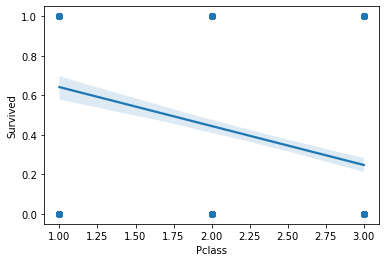

In [54]:
#regression logistique
import seaborn as sns
sns.regplot(x='Pclass',y='Survived',data=data)


In [55]:
#on constate qu'il y a plus de décés dans la 3em classe

<AxesSubplot:xlabel='Survived', ylabel='Pclass'>

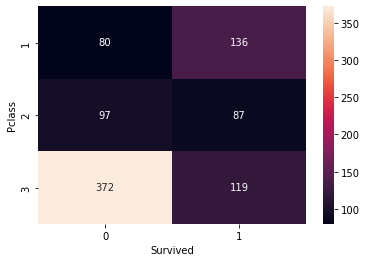

In [56]:
titanic=data
#dataset Pclass et Survived  avec la matricee confusion
group = titanic.groupby(['Pclass', 'Survived'])
pclass_survived = group.size().unstack()
 
# Heatmap - Color encoded 2D representation of data.
sns.heatmap(pclass_survived, annot = True, fmt ="d")

In [ ]:
#on constate :
# que le coup de survie est plus elevée dans la classe superieure
#qu'il y a plus de survivant dans la 1ere classe que dans la 2em et 3em classe
#donc on peut conclure que Pclass  contribue au taux de survie

In [57]:
#rapport de classement
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.73      0.80      0.76       144
           1       0.56      0.47      0.51        79

    accuracy                           0.68       223
   macro avg       0.65      0.63      0.64       223
weighted avg       0.67      0.68      0.67       223



In [62]:

#La “courbe ROC” vient de l’anglais ROC pour Receiver Operating Characteristic,
#ou fonction d’efficacité du récepteur en français. Elle trace l’ensemble des 
#valeurs du couple (1-Specificity, Sensitivity) selon le seuil de classification.

# classification du SVM 
from sklearn.svm import SVC
model_SVC = SVC(kernel = 'rbf', random_state = 4)
model_SVC.fit(x_train, y_train)

y_pred_svm = model_SVC.decision_function(x_test)

In [63]:
#classification logistique
from sklearn.linear_model import LogisticRegression

y_pred_logistic = logreg.decision_function(x_test)

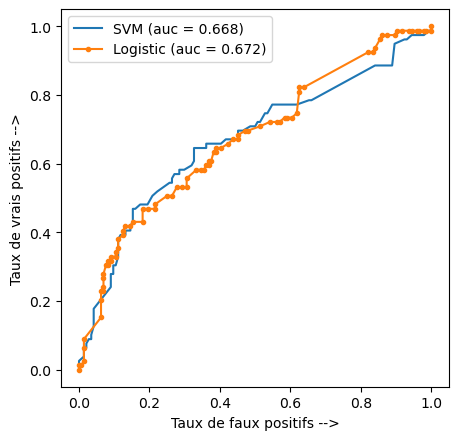

In [65]:
#comparaison entre la courbe ROC et AUC
from sklearn.metrics import roc_curve, auc

#extraction des donnée ROC et AUC
logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred_logistic)

auc_logistic = auc(logistic_fpr, logistic_tpr)

svm_fpr, svm_tpr, threshold = roc_curve(y_test, y_pred_svm)
auc_svm = auc(svm_fpr, svm_tpr)

#tracage de la courbe
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (auc = %0.3f)' % auc_svm)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)

plt.xlabel('Taux de faux positifs -->')
plt.ylabel('Taux de vrais positifs -->')

plt.legend()

plt.show()